# Physics

In [1]:
%load_ext autoreload
%autoreload 2

pyremo contains a simple physics package with common algorithms that were used in a number of legacy fortran programs in and around REMO. For convenience, these algorithms are now implemented in the `pyremo.physics` package. Typical reacurring tasks are, e.g., the derivation relative (`RELHUM`) and specific humidity (`QD`) or liquid water content (`QW`) using temperature and pressure. 

In [2]:
import pyremo as pr

In [5]:
ds = pr.tutorial.load_dataset()

In [18]:
ds.QW

<xarray.DataArray 'QW' (time: 1, lev: 27, rlat: 121, rlon: 129)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          6.4177078e-35, 1.3741836e-35, 1.3741836e-35],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          6.4177078e-35, 1.3741836e-35, 1.3741836e-35],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          4.4477699e-36, 1.4144066e-36, 1.4144066e-36],
...
         [1.0150239e-10, 1.0150239e-10, 0.0000000e+00, ...,
          0.0000000e+00, 2.6016007e-15, 2.6016007e-15],
         [3.0804446e-11, 3.0804446e-11, 1.5331994e-11, ...,
          0.0000000e+00, 5.3168613e-16, 5.3168613e-16],
         [3.0804446e-11, 3.0804446e-11, 1.5331994e-11, ...,
          0.0000000e+00, 5.3168613e-16, 5.3168613e-16]],

        [[1.6961324e-34, 1.6961324e-34, 4.3454384e-35, ...,
          1.8709044e-16, 1.0842434e-17, 1.0842434e-17],
         [1.6961324e-34, 1.6961324e-34, 4.3454384e-35, ...,
          1.8709044e-16, 1.0842434e-17, 1.0842434e-17],
         [3.8429957e-34, 3.8429957e-34, 0.0000000e+00, ...,
          0.0000000e+00, 7.7848159e-19, 7.7848159e-19],
         ...,
         [3.6287397e-11, 3.6287397e-11, 0.0000000e+00, ...,
          0.0000000e+00, 1.5216751e-16, 1.5216751e-16],
         [2.2274710e-11, 2.2274710e-11, 6.0257025e-12, ...,
          4.4610082e-18, 7.7761239e-18, 7.7761239e-18],
         [2.2274710e-11, 2.2274710e-11, 6.0257025e-12, ...,
          4.4610082e-18, 7.7761239e-18, 7.7761239e-18]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 23.0 24.0 25.0 26.0 27.0
Attributes:
    grid_mapping:  rotated_pole
    variable:      QW
    description:   liquid water content
    units:         kg/kg
    layer:         110.0
    code:          153

In [62]:
p = ds.hyam + ds.hybm * ds.PS

In [7]:
p = pr.physics.pressure(ds.PS, ds.hyam, ds.hybm)

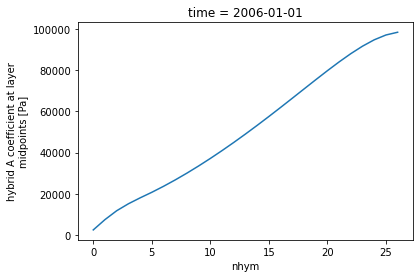

In [11]:
p.mean(("rlat", "rlon")).plot()

In [43]:
relhum = pr.physics.relative_humidity(ds.T, ds.QD, p, ds.QW)

In [44]:
relhum

<xarray.DataArray 'RELHUM' (time: 1, rlon: 129, rlat: 121, lev: 27)>
array([[[[0.00439403, 0.11971043, 0.16309664, ..., 0.1299705 ,
          0.11739039, 0.13834377],
         [0.00439403, 0.11971043, 0.16309664, ..., 0.1300012 ,
          0.11741816, 0.13837644],
         [0.00446119, 0.11331841, 0.16275622, ..., 0.12160356,
          0.11040239, 0.12835672],
         ...,
         [0.07878333, 0.10436384, 0.08973376, ..., 0.86213934,
          0.7975002 , 0.8664127 ],
         [0.08245723, 0.10925177, 0.09203417, ..., 0.9140059 ,
          0.8825682 , 0.846055  ],
         [0.08432049, 0.10925177, 0.09203417, ..., 0.9144517 ,
          0.88299894, 0.846468  ]],

        [[0.00439403, 0.11971043, 0.16309664, ..., 0.13183293,
          0.11907449, 0.14032607],
         [0.00439403, 0.11971043, 0.16309664, ..., 0.12933676,
          0.11681734, 0.13766924],
         [0.00446119, 0.11331841, 0.16275622, ..., 0.120522  ,
          0.10941931, 0.12721509],
...
         [0.03345529, 0.02400588, 0.04209268, ..., 0.73600554,
          0.7156708 , 0.69347453],
         [0.03448566, 0.0243837 , 0.0424296 , ..., 0.7356987 ,
          0.71652293, 0.69048494],
         [0.03448566, 0.0243837 , 0.0424296 , ..., 0.73705316,
          0.7178425 , 0.69175655]],

        [[0.0042134 , 0.10986983, 0.07906881, ..., 0.1235046 ,
          0.34572414, 0.4383698 ],
         [0.0042134 , 0.10986983, 0.07906881, ..., 0.12318358,
          0.34482515, 0.43723074],
         [0.00434811, 0.11865692, 0.08555034, ..., 0.12537453,
          0.32058468, 0.3401644 ],
         ...,
         [0.03345529, 0.02400588, 0.04209268, ..., 0.7378475 ,
          0.71746254, 0.69521064],
         [0.03448566, 0.0243837 , 0.0424296 , ..., 0.7379158 ,
          0.71868294, 0.69256645],
         [0.03448566, 0.0243837 , 0.0424296 , ..., 0.73650134,
          0.7173049 , 0.6912385 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 23.0 24.0 25.0 26.0 27.0
Attributes:
    grid_mapping:  rotated_pole
    variable:      T
    description:   temperature
    units:         K
    layer:         110.0
    code:          130

In [45]:
qd = pr.physics.specific_humidity(ds.T, relhum, p)

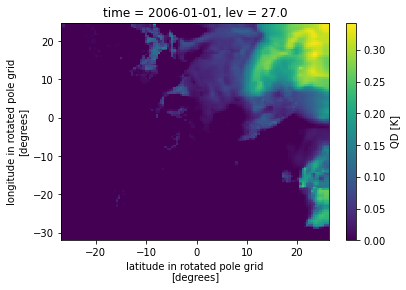

In [47]:
import xarray as xr

(abs(qd - ds.QD) / ds.QD).isel(lev=26).plot()

In [17]:
qw = pr.physics.liquid_water_content(ds.T, relhum, p)
qw

<xarray.DataArray 'QW' (time: 1, rlon: 129, rlat: 121, lev: 27)>
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 23.0 24.0 25.0 26.0 27.0
Attributes:
    grid_mapping:  rotated_pole
    variable:      T
    description:   temperature
    units:         K
    layer:         110.0
    code:          130

In [141]:
pr.codes.get_dict("QW")

{'variable': 'QW',
 'description': 'liquid water content',
 'units': 'kg/kg',
 'layer': 110.0,
 'time_cell_method': None,
 'cf_name': None,
 'code': 153}